In [1]:
import random

import numpy as np
import pandas
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:

df_train = pd.read_csv("Data/tabular-playground-series-sep-2022/train.csv")
df_test = pd.read_csv("Data/tabular-playground-series-sep-2022/test.csv")
df_train

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...,...
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135


In [3]:
def impute_data(df):
    # Not necessary
    return df


def convert_date(df):
    dates: [date] = [date.fromisoformat(x) for x in df["date"].values]
    weekdays = pd.get_dummies(pd.Series([d.weekday() for d in dates], copy=True), prefix="weekday")
    years = pd.get_dummies(pd.Series([d.isocalendar()[0] for d in dates], copy=True), prefix="years")
    weeks = pd.get_dummies(pd.Series([d.isocalendar()[1] for d in dates], copy=True), prefix="weeks")
    months = pd.get_dummies(pd.Series([d.month for d in dates], copy=True), prefix="months")
    return weekdays, weeks, months, years





def data_pipe(df):
    #TODO Date
    countries = pd.get_dummies(df.country, prefix="country")
    stores = pd.get_dummies(df.store, prefix="store")
    products = pd.get_dummies(pd.Series([w.replace(" ", "_") for w in df["product"].values]), prefix="product")
    weekdays, weeks, months, years = convert_date(df)
    df = df.drop(["country", "store", "product", "date"], axis=1)
    df = df.join([countries, stores, products, weekdays, weeks, months, years])
    return df

In [4]:
df = data_pipe(pd.concat([df_train.drop("num_sold", axis=1), df_test])).drop_duplicates(subset=["row_id"]).sort_values(by="row_id")
df_train = df.iloc[:len(df_train)].join(df_train["num_sold"])
df_test = df.iloc[len(df_train):]

In [5]:
df_test

,row_id,country_Belgium,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleMart,store_KaggleRama,product_Kaggle_Advanced_Techniques,...,months_9,months_10,months_11,months_12,years_2016,years_2017,years_2018,years_2019,years_2020,years_2021
0,70128,1,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,70129,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,70130,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,70131,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,70132,1,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,87643,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
17516,87644,0,0,0,0,0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,0
17517,87645,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
17518,87646,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0


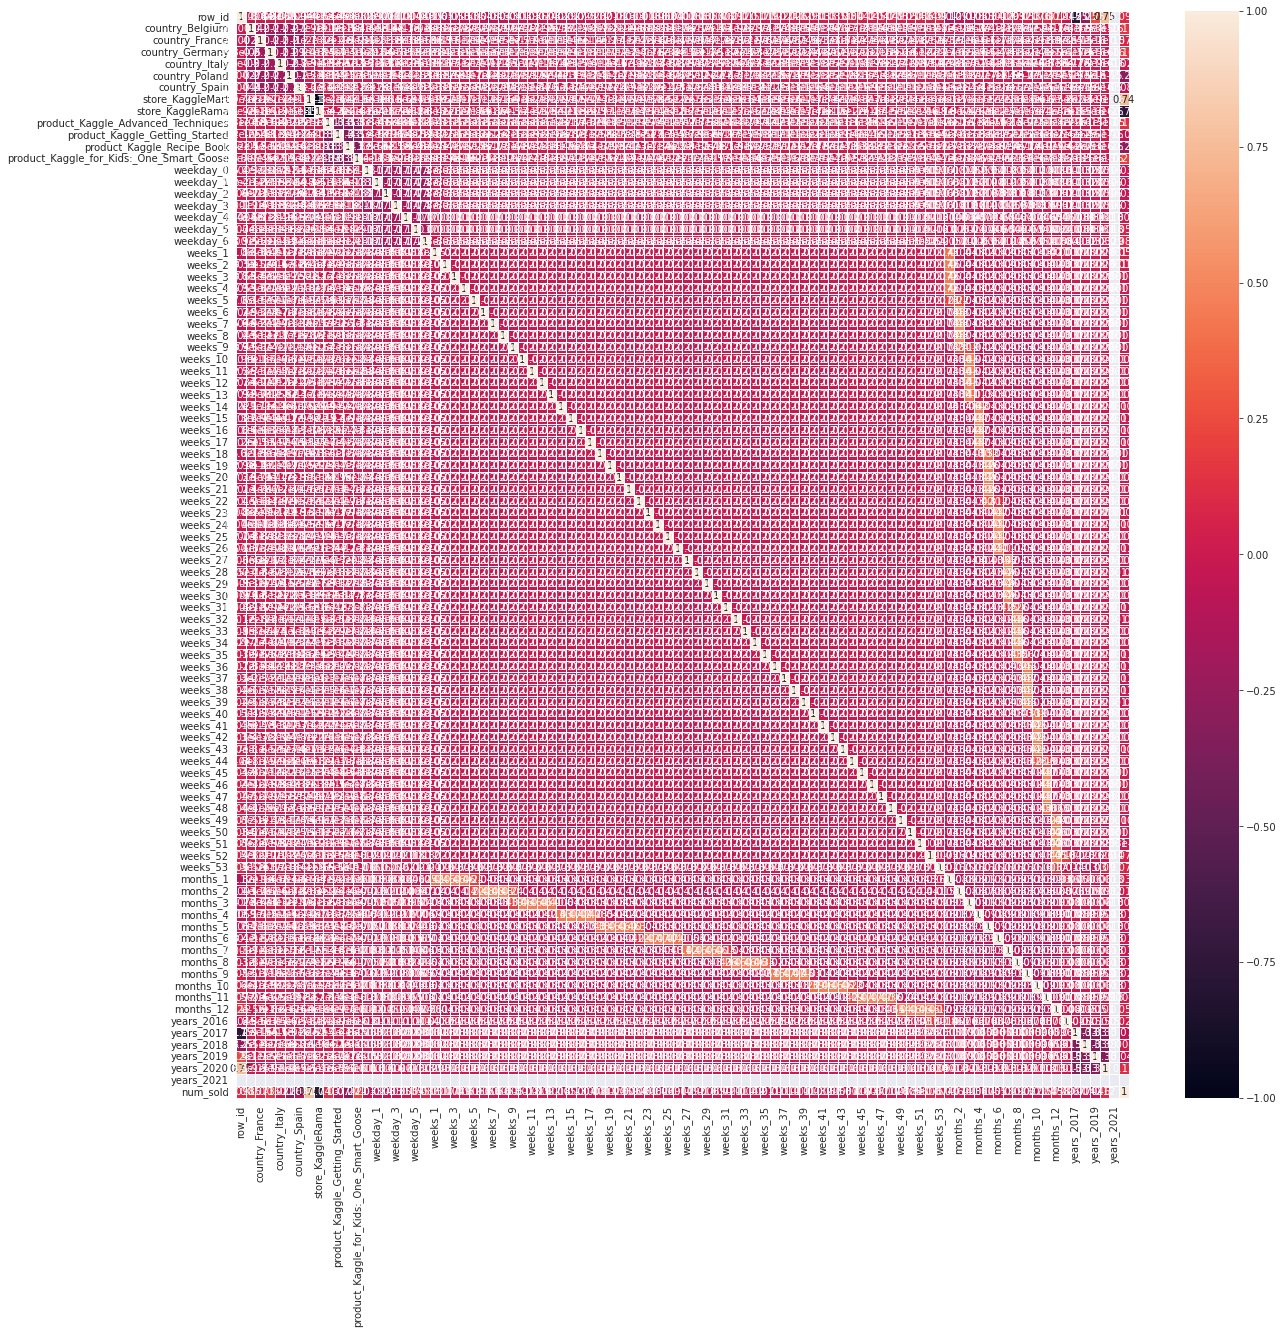

In [6]:
corr = df_train.corr()
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches

sns.heatmap(corr, linewidths=0.5, annot=True, ax=ax)
plt.show()

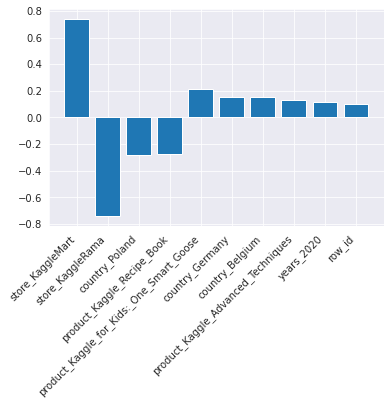

In [7]:
x_ticks = corr["num_sold"].index
values = corr["num_sold"].array
sorted_vals = sorted(zip(x_ticks, values), key=lambda x: abs(x[1]), reverse=True)
sorted_x = [x[0] for x in sorted_vals]
sorted_val = [x[1] for x in sorted_vals]
plt.bar(sorted_x[:10], sorted_val[:10])
plt.xticks(rotation=45, ha="right")
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor
from sklearn import svm
from sklearn.metrics import mean_absolute_percentage_error as score
import xgboost as xgb


In [9]:
train, val = train_test_split(df_train, test_size=0.15, random_state=27, shuffle=True)
x_train, y_train = train.drop(["num_sold", "row_id"], axis=1), train["num_sold"]
x_val, y_val = val.drop(["num_sold", "row_id"], axis=1), val["num_sold"]

In [10]:
x_train_sk, x_val_sk = x_train[sorted_x[:9]], x_val[sorted_x[:9]]


In [43]:
clf_gbc = GradientBoostingRegressor(random_state=27).fit(x_train_sk, y_train)
preds = clf_gbc.predict(x_val_sk)
score(y_val, preds)

0.15456094554326721

In [44]:
clf_xgb = xgb.XGBRegressor(random_state=27).fit(x_train_sk, y_train)
preds = clf_xgb.predict(x_val_sk)
score(y_val, preds)

/home/erik/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.15043512236389134

In [45]:
clf_rf = RandomForestRegressor(random_state=27).fit(x_train_sk, y_train)
preds = clf_rf.predict(x_val_sk)
score(y_val, preds)

0.15043541732835278

In [46]:
clf_bc = BaggingRegressor(random_state=27).fit(x_train_sk, y_train)
preds = clf_bc.predict(x_val_sk)
score(y_val, preds)

0.15039837379394763

In [47]:
clf_svm = svm.SVR().fit(x_train_sk, y_train)
preds = clf_svm.predict(x_val_sk)
score(y_val, preds)

0.14671028636771544

In [16]:
import torch
from torch import nn

class MyNNClassifier(nn.Module):

    def __init__(self, feature_size, output_dim, hidden_dim=128):
        super().__init__()

        self.input = nn.Linear(feature_size, hidden_dim)
        self.relu = nn.ReLU()
        self.hidden_0 = nn.Linear(hidden_dim, hidden_dim)
        self.batchnorm_0 = nn.BatchNorm1d(hidden_dim)
        self.hidden_1 = nn.Linear(hidden_dim, hidden_dim)
        self.batchnorm_1 = nn.BatchNorm1d(hidden_dim)
        self.output = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()
        self.layers = [self.input, self.hidden_0, self.batchnorm_0, self.hidden_1, self.batchnorm_1]

    def forward(self, x):
        a = x
        for layer in self.layers:
            z = layer(a)
            a = self.relu(z)
        z_out = self.output(a)
        # a_out = self.sigmoid(z_out)
        a_out = z_out
        return a_out



In [17]:
from tqdm import tqdm, trange
from torch.utils.data import DataLoader

device = "cuda"

In [18]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    """
    Train our model
    """
    model.train()
    for epoch in (pbar:= tqdm(range(1, n_epochs + 1))):
        loss_train = 0.0
        for features, labels in train_loader:
            # print(features.shape)

            features = features.to(device=device)
            labels = labels.to(device=device)

            outputs = model(features)
            # print(outputs.dtype, labels.dtype)
            loss = loss_fn(outputs, labels)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            loss_train += loss.item()

        # if epoch == 1 or epoch % 10 == 0:
        #     print('{}  |  Epoch {}  |  Training loss {:.3f}'.format(
        #         0, epoch,
        #         loss_train / len(train_loader)))
        pbar.set_description('{}  |  Epoch {}  |  Training loss {:.3f}'.format(0, epoch, loss_train / len(train_loader)))
    model.eval()

In [19]:
x_train_tensor, y_train_tensor = torch.tensor(x_train.values, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
class TorchDataset:

    def __init__(self, x, y):
        self.features = x
        self.labels = y

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

    def __len__(self):
        return self.features.shape[0]

t_dataset = TorchDataset(x_train_tensor, y_train_tensor)
loader = DataLoader(t_dataset, batch_size=256)
x_train_tensor.shape

torch.Size([59608, 90])

In [20]:
model = MyNNClassifier(x_train_tensor.shape[1], 1, hidden_dim=1024)
optim = torch.optim.Adam(model.parameters(), lr=0.00001)
loss = nn.MSELoss()
model.to(device)

MyNNClassifier(
  (input): Linear(in_features=90, out_features=1024, bias=True)
  (relu): ReLU()
  (hidden_0): Linear(in_features=1024, out_features=1024, bias=True)
  (batchnorm_0): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hidden_1): Linear(in_features=1024, out_features=1024, bias=True)
  (batchnorm_1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output): Linear(in_features=1024, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [29]:
training_loop(750, optim, model, loss, loader)


0  |  Epoch 600  |  Training loss 8.061: 100%|██████████| 600/600 [05:28<00:00,  1.83it/s] 


In [35]:
def validate(model, loader):
    """
    Compute classification accuracies on both train and val dataset
    """
    accdict = {}
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in loader:
            features = features.to(device=device)
            labels = labels.to(device=device)

            outputs = model(features).cpu()
            # predicted = torch.round(outputs)
            total += 1
            correct += score(labels.cpu(), outputs)

    print("Accuracy {}: {:.2f}".format("val" , correct / total))
    accdict["val"] = correct / total
    return accdict

In [36]:
acc = validate(model, loader)


Accuracy val: 0.05


In [48]:
df = df_test
# train, val = train_test_split(df, test_size=0.15, random_state=27, shuffle=True)
x, y = df.drop(["row_id"], axis=1), df["row_id"]
x = x[sorted_x[:9]]
y_pred = clf_svm.predict(x)

In [49]:
y_pred

array([391.09972522, 332.90039214, 245.89973085, ...,  84.10013946,
        62.89962429, 112.09989227])

In [50]:
results = []

for x_, y_ in zip(y_pred, y):
    results.append((y_, x_))

In [51]:
results

[(70128, 391.09972521620443),
 (70129, 332.90039214455584),
 (70130, 245.89973085452553),
 (70131, 423.1003615807301),
 (70132, 145.1002072153969),
 (70133, 115.10000605895533),
 (70134, 85.89992253584771),
 (70135, 152.89989895113925),
 (70136, 302.9002894717614),
 (70137, 244.09989217131283),
 (70138, 181.1003655031774),
 (70139, 325.72832798350686),
 (70140, 105.09970705697394),
 (70141, 84.10013945652707),
 (70142, 62.8996242888185),
 (70143, 112.09989227053141),
 (70144, 394.9001055989626),
 (70145, 330.900416696911),
 (70146, 244.3917280538513),
 (70147, 424.1897164370216),
 (70148, 144.90009604892484),
 (70149, 115.09984023197907),
 (70150, 86.09974188224781),
 (70151, 151.89981268276514),
 (70152, 302.9002894717614),
 (70153, 244.09989217131283),
 (70154, 181.1003655031774),
 (70155, 325.72832798350686),
 (70156, 105.09970705697394),
 (70157, 84.10013945652707),
 (70158, 62.8996242888185),
 (70159, 112.09989227053141),
 (70160, 141.8997801679857),
 (70161, 107.90039570520067),


In [53]:
with open("Data/tabular-playground-series-sep-2022/results.csv", 'w') as file:
    file.write("row_id,num_sold\n")
    for id, pred in results:
        file.write(str(int(id)) + "," + str(float(pred)) + "\n")